# What is the impact of agricultural corn field expansion rate on deforestation rate in countries?


By Platypus

### Installing packages

### Import libraries

In [92]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata
import numpy as np
import pycountry
import plotly.express as px

In [93]:
filepath = 'https://raw.githubusercontent.com/ZeliaDec/DataScience/main/Data/'

In [94]:
# Function to get ISO-3 country code from country name
def get_iso3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None

In [95]:
last_df = pd.read_csv("./Data/Database.csv")

# Inclusion of the dummy for the heterogeneity variable in sq km

In [96]:
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790


In [97]:
#Dummy for the heterogeneity variable
# Finding the median of Land_Size
initial_hetero_var = last_df['suitability']
median_suitable_land = initial_hetero_var.median()
median_suitable_land
# Creating a dummy variable for whether the land size is higher than the median
last_df['heterogeneityDummy'] = last_df['suitability'].apply(lambda val: 1 if (val>median_suitable_land) else 0)
last_df


,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351,1
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250,1
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376,1
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114,1
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867,1
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274,1
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721,1
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790,1


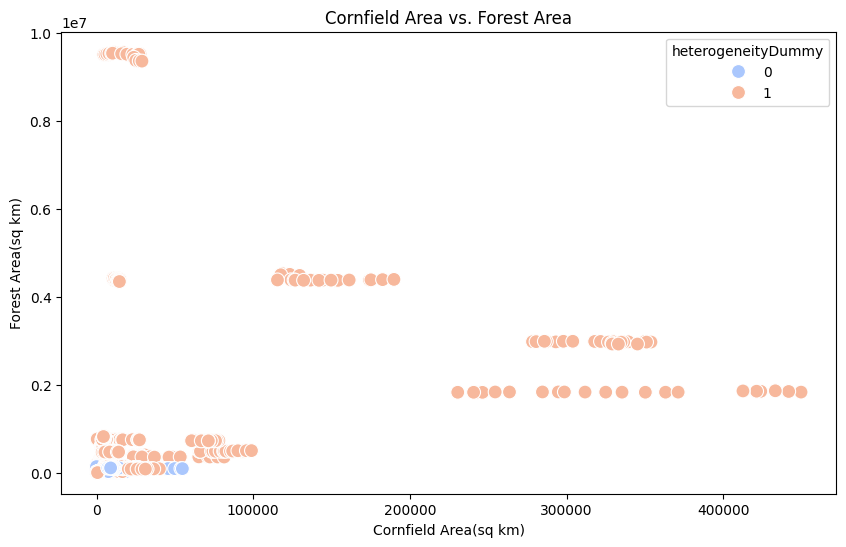

In [98]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=last_df,
                x='corn',
                y='forest',
                hue='heterogeneityDummy',
                palette='coolwarm',
                s=100)

# Adding labels and title
plt.title('Cornfield Area vs. Forest Area')
plt.xlabel('Cornfield Area(sq km)')
plt.ylabel('Forest Area(sq km)')

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

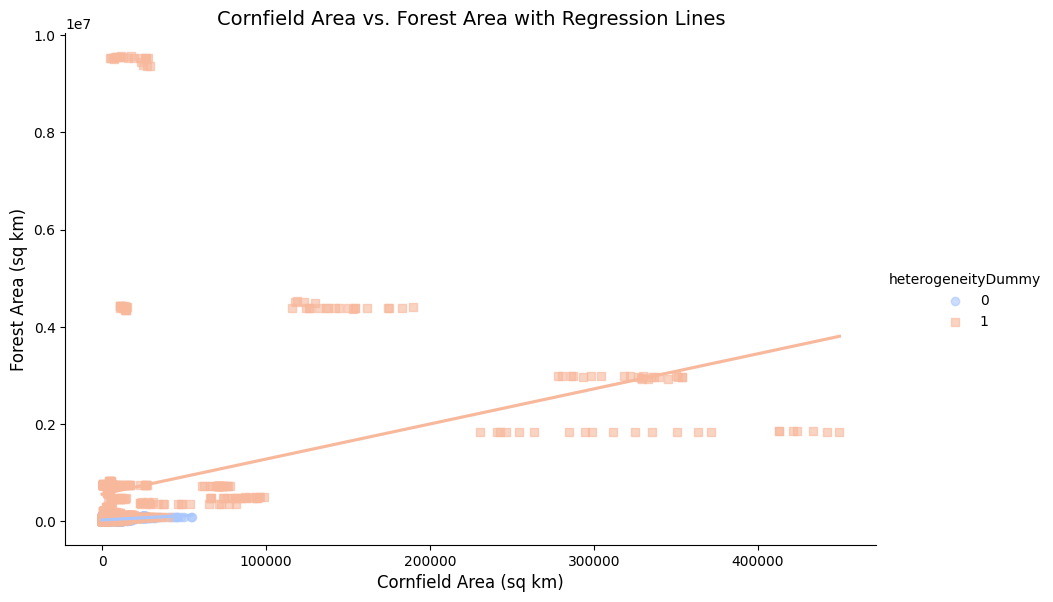

In [99]:
plt.figure(figsize=(10, 6))

# Create a scatterplot with regression lines
sns.lmplot(
    data=last_df,
    x='corn',
    y='forest',
    hue='heterogeneityDummy',
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Cornfield Area vs. Forest Area with Regression Lines', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

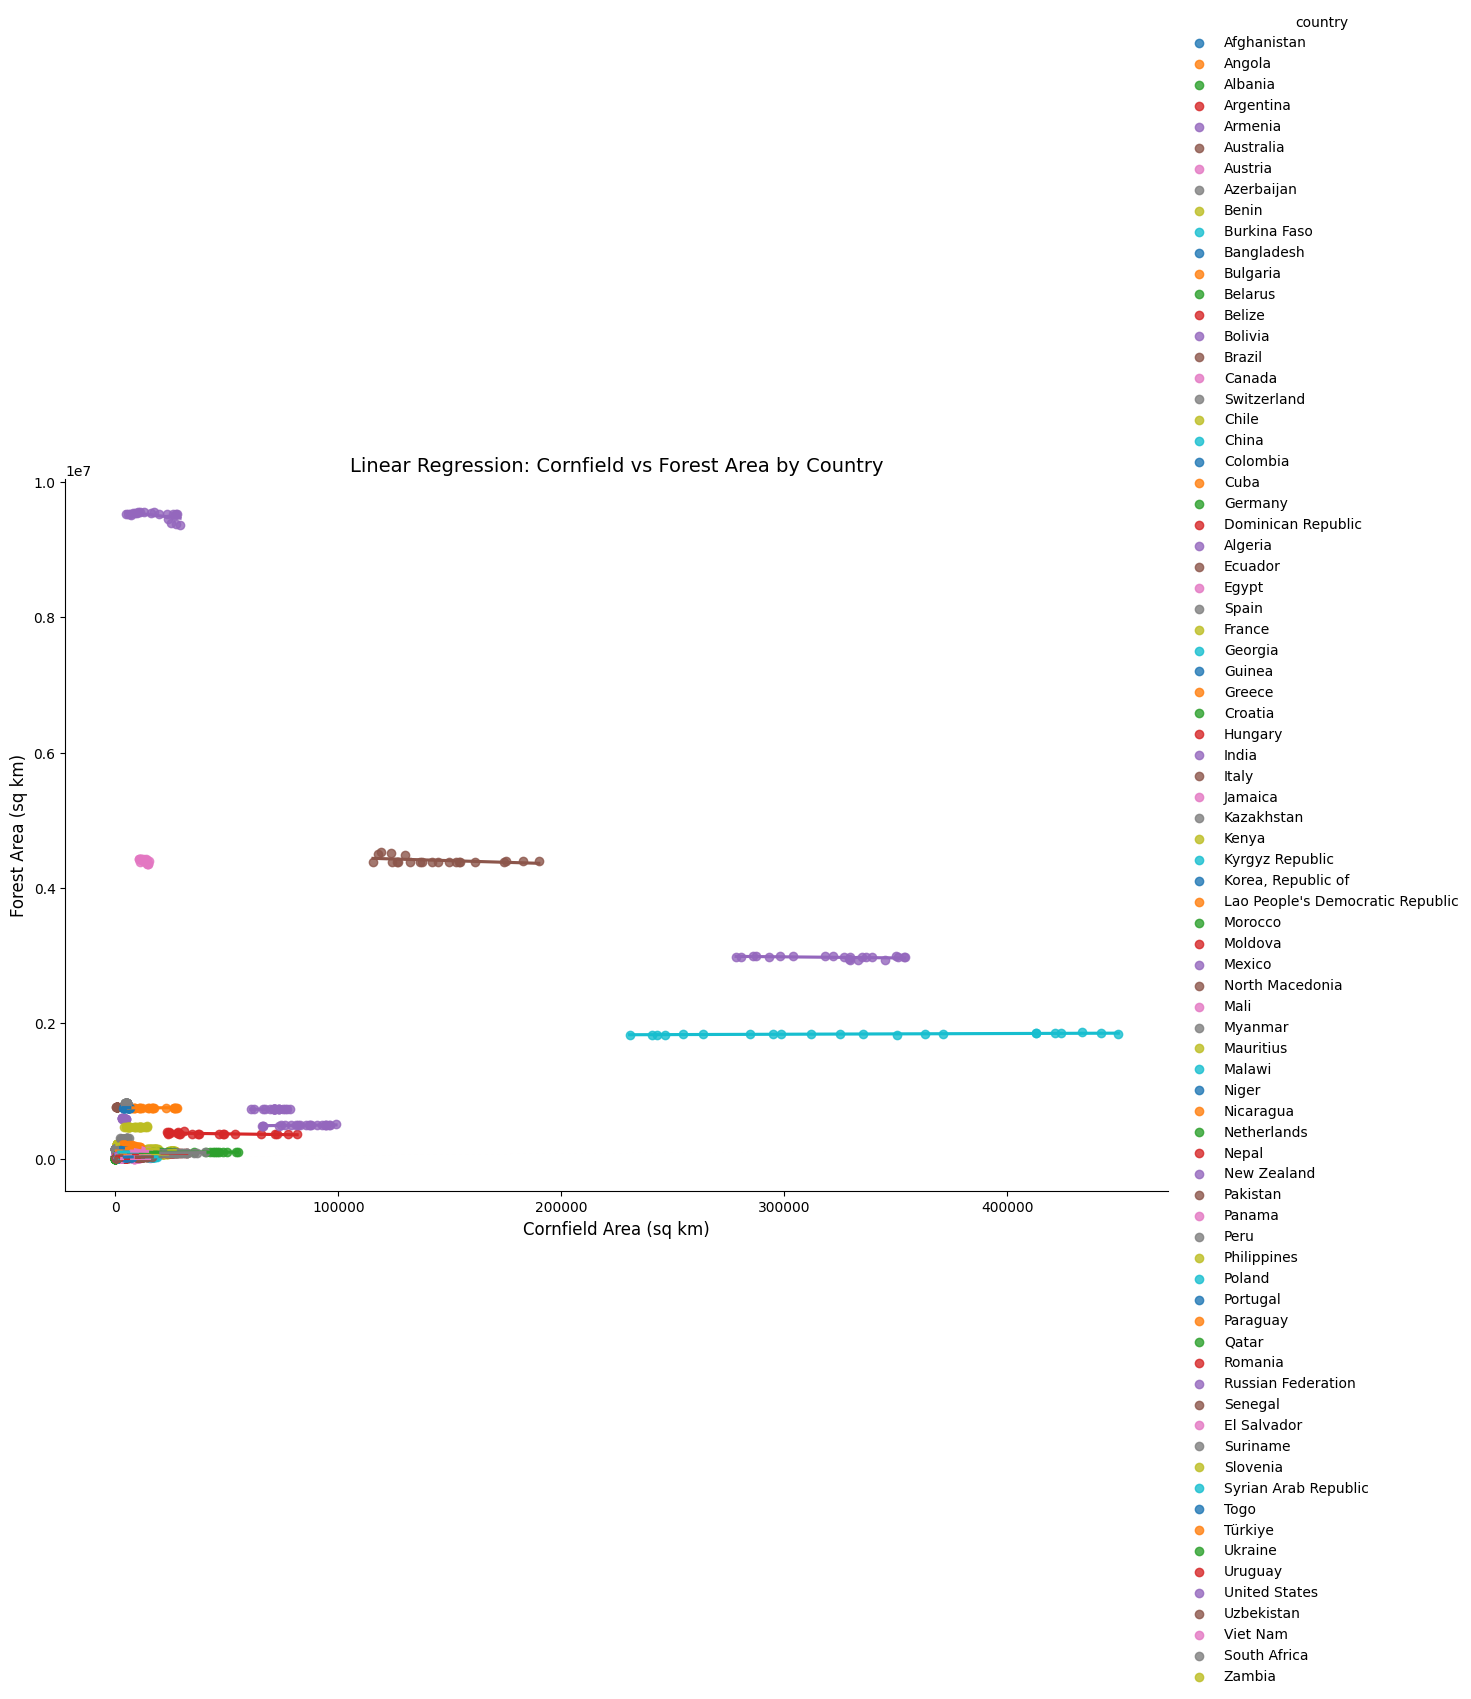

In [100]:
# Multiple linear regression lines, one for each country
sns.lmplot(
    data=last_df,
    x='corn',
    y='forest',
    hue='country',  # Different colors for each country
    palette='tab10',  # Choose a palette
    ci=None,  # Remove confidence intervals for clarity
    height=8,  # Figure height
    aspect=1.5  # Aspect ratio
)

# Add labels and title
plt.title('Linear Regression: Cornfield vs Forest Area by Country', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

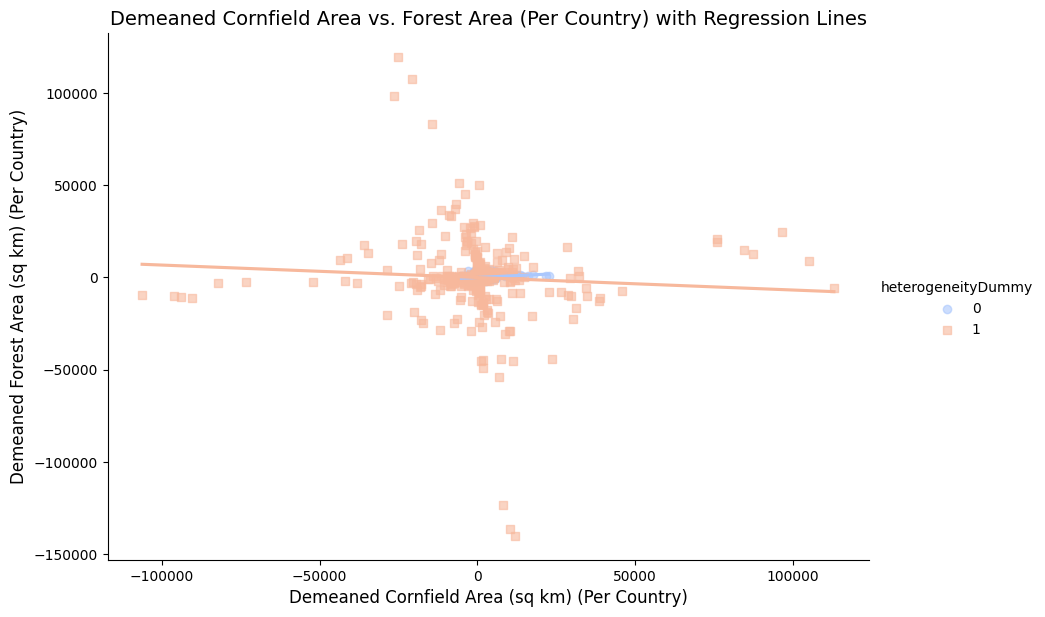

In [101]:
# Demean Cornfield Area` and  Forest Area` within each country
last_df['Demeaned_Cornfield_Area'] = last_df.groupby('country')['corn'].transform(lambda x: x - x.mean())
last_df['Demeaned_Forest_Area'] = last_df.groupby('country')['forest'].transform(lambda x: x - x.mean())

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='heterogeneityDummy',  # Group by suitability
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (sq km) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (sq km) (Per Country)', fontsize=12)

# Show the plot
plt.show()

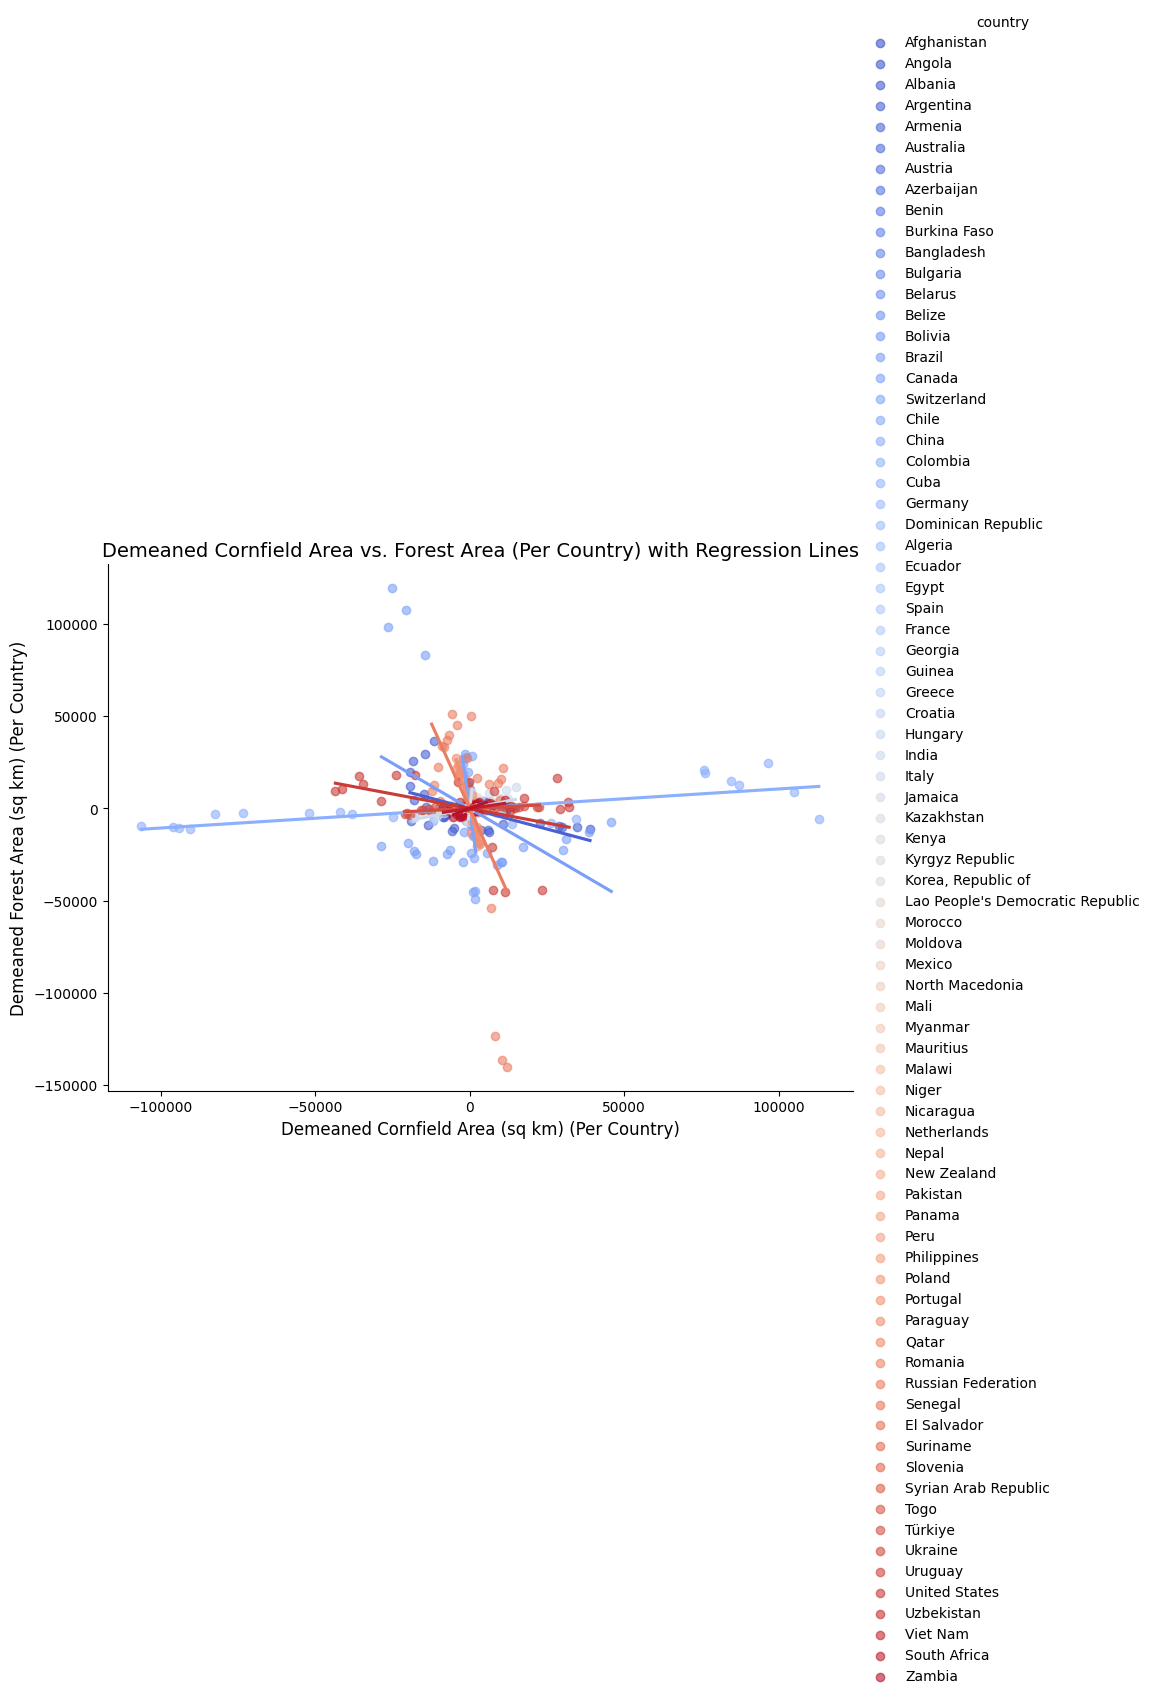

In [102]:

# Plot the demeaned data
sns.lmplot(
    data=last_df,
    x='Demeaned_Cornfield_Area',  # Demeaned Cornfield Area per country
    y='Demeaned_Forest_Area',  # Demeaned Forest Area per country
    hue='country',  # Group by suitability
    palette='coolwarm',
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Demeaned Cornfield Area vs. Forest Area (Per Country) with Regression Lines', fontsize=14)
plt.xlabel('Demeaned Cornfield Area (sq km) (Per Country)', fontsize=12)
plt.ylabel('Demeaned Forest Area (sq km) (Per Country)', fontsize=12)

# Show the plot
plt.show()

In [103]:
# correlation between cornfield area and forest area for group 0,
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['heterogeneityDummy']==0]
correlation0 = group0['corn'].corr(group0['forest'])

# correlation between cornfield area and forest area for group 1,
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['heterogeneityDummy']==1]
correlation1 = group1['corn'].corr(group1['forest'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: 0.33870468697508477
Correlation for Group 1: 0.3099712925046744


In [104]:
# correlation between cornfield area and forest area for group 0,
#so for countries with suitable land available for corn expansion lower than the median:
group0 = last_df[last_df['heterogeneityDummy']==0]
correlation0 = group0['Demeaned_Cornfield_Area'].corr(group0['Demeaned_Forest_Area'])

# correlation between cornfield area and forest area for group 1,
#so for countries with suitable land available for corn expansion higher than the median:
group1 = last_df[last_df['heterogeneityDummy']==1]
correlation1 = group1['Demeaned_Cornfield_Area'].corr(group1['Demeaned_Forest_Area'])

print(f"Correlation for Group 0: {correlation0}")
print(f"Correlation for Group 1: {correlation1}")

Correlation for Group 0: 0.24889004354742772
Correlation for Group 1: -0.06699204737296095


## Multiple Linear Regressions

<Axes: xlabel='heterogeneityDummy'>

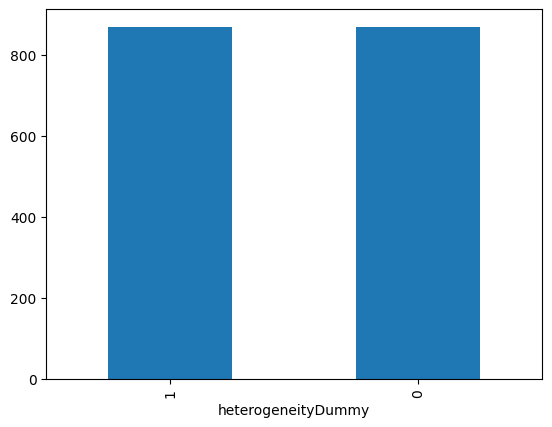

In [105]:
last_df["heterogeneityDummy"].value_counts().plot(kind = "bar")

The regression equation from the results is:

$$
\hat{Y}_{it} = \beta_{0} + \beta_1 X_{1it} + \beta_2 H_{it} + \beta_2 X_{2it} + \beta_3 X_{3it} + \beta_4 X_{4it} +\beta_5 (X_{1it}*H_{it}) + \epsilon_{it}
$$

Where:
- $\hat{Y}$: Predicted Forest Area in sq km
- $X_1$: Cornfield in sq km
- $H_{it}$: Suitable land for corn field extension. Heterogeneity variable, higher than median
- $X_2$: Average Temperature
- $X_3$: Corn price per bushel
- $X_4$: GDP
- $X_1 * H_{it}$: **Interaction variable** between **Cornfield in sq km** and **Suitable Land Higher Than Median**
- $\beta_0, \beta_1, \beta_2, \beta_3, \beta_4, \beta_5$: Coefficients from the regression model.


In [106]:
import statsmodels.api as sm

#Multivariable regression /w Temperature_Change
ind_x = last_df[["corn","suitability","temperature","price", "gdp", "landArea"]]
ind_x["Interaction variable"] = last_df["heterogeneityDummy"]*ind_x["corn"]

dep_y = last_df["forest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_7190/3045897017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_x["Interaction variable"] = last_df["heterogeneityDummy"]*ind_x["corn"]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 forest   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     2222.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:33:19   Log-Likelihood:                -24925.
No. Observations:                1738   AIC:                         4.987e+04
Df Residuals:                    1730   BIC:                         4.991e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -1.817e+05    3.4e+04     -5.351      0.000   -2.48e+05   -1.15e+05
corn                    -0.5973      1.662     -0.359      0.719      -3.857       2.663
suitability             -1.3737      0.054    -25.444      0.000      -1.480      -1.268
temperature           7.858e+04   1.86e+04      4.234      0.000    4.22e+04    1.15e+05
price                -5047.0183   7001.850     -0.721      0.471   -1.88e+04    8685.964
gdp                      0.0186      0.009      2.124      0.034       0.001       0.036
landArea                 0.6493      0.007     86.817      0.000       0.635       0.664
Interaction variable    -2.1560      1.706     -1.264      0.207      -5.503       1.191
==============================================================================
Omnibus:                     1152.378   Durbin-Watson:                   0.104
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17063.661
Skew:                          -2.925   Prob(JB):                         0.00
Kurtosis:                      17.192   Cond. No.                     1.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#CodeZ
#Multivariable regression /w Average_Temperature
ind_x = last_df[["corn","suitability","Average_Temperature","price", "gdp", "landArea"]]
ind_x["Interaction variable"] = last_df["heterogeneityDummy"]*ind_x["corn"]

dep_y = last_df["forest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_7190/2660959855.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_x["Interaction variable"] = last_df["heterogeneityDummy"]*ind_x["corn"]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 forest   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     2425.
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:33:19   Log-Likelihood:                -24857.
No. Observations:                1738   AIC:                         4.973e+04
Df Residuals:                    1730   BIC:                         4.977e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.969e+05   3.75e+04      5.254      0.000    1.23e+05     2.7e+05
corn                    -0.2643      1.593     -0.166      0.868      -3.389       2.861
suitability             -1.5466      0.054    -28.747      0.000      -1.652      -1.441
Average_Temperature  -1.698e+04   1337.031    -12.701      0.000   -1.96e+04   -1.44e+04
price                  388.0880   6683.835      0.058      0.954   -1.27e+04    1.35e+04
gdp                     -0.0005      0.009     -0.063      0.950      -0.017       0.016
landArea                 0.6526      0.007     90.749      0.000       0.638       0.667
Interaction variable    -1.3097      1.636     -0.800      0.424      -4.519       1.900
==============================================================================
Omnibus:                      979.466   Durbin-Watson:                   0.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9760.967
Skew:                          -2.480   Prob(JB):                         0.00
Kurtosis:                      13.497   Cond. No.                     1.34e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.34e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Correlation Matrix:
                          corn  suitability  Average_Temperature     price  \
corn                  1.000000     0.697299            -0.120314  0.021447   
suitability           0.697299     1.000000            -0.360761 -0.002707   
Average_Temperature  -0.120314    -0.360761             1.000000  0.009894   
price                 0.021447    -0.002707             0.009894  1.000000   
gdp                   0.841914     0.612448            -0.216390  0.057780   
landArea              0.566457     0.872723            -0.312175 -0.000072   
Interaction variable  0.994116     0.709002            -0.124152  0.018055   
forest                0.356814     0.663018            -0.334987 -0.000596   

                           gdp  landArea  Interaction variable    forest  
corn                  0.841914  0.566457              0.994116  0.356814  
suitability           0.612448  0.872723              0.709002  0.663018  
Average_Temperature  -0.216390 -0.312175            

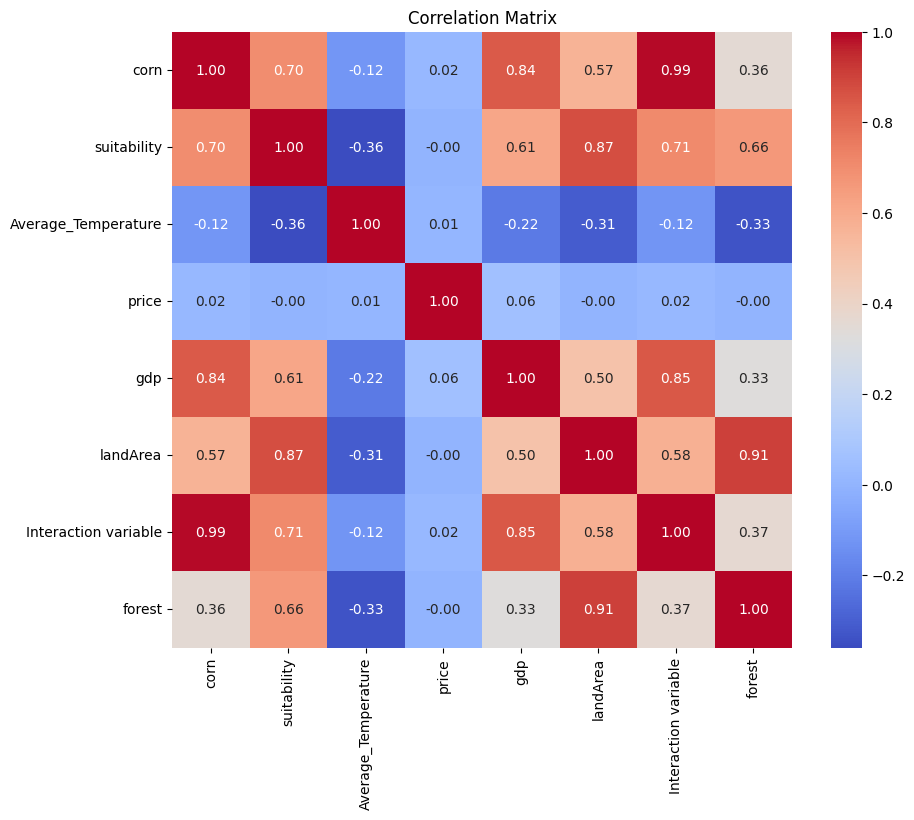

In [108]:
# Combine independent variables and dependent variable for the correlation matrix
variables = ind_x.drop(columns="const").join(dep_y.rename("forest"))

# Compute the correlation matrix
correlation_matrix = variables.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [109]:
last_df["logcorn"]= np.log(last_df["corn"])
last_df["logforest"]= np.log(last_df["forest"])
last_df["logland"]= np.log(last_df["landArea"])
last_df["loggdp"]= np.log(last_df['gdp'])
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,logcorn,logforest,logland,loggdp
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351,1,-514.690455,550.450000,6.866933,9.415817,13.388153,8.169583
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250,1,-674.690455,244.650000,6.684612,9.390601,13.388153,8.194374
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376,1,-474.690455,120.450000,6.907755,9.380176,13.388153,8.362920
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114,1,1025.309545,4.650000,7.824046,9.370357,13.388153,8.496744
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142,1,1025.309545,-63.550000,7.824046,9.364528,13.388153,8.613244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867,1,5456.480000,3055.713636,9.570769,13.067789,13.518976,10.161815
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274,1,1977.100000,2671.613636,9.292847,13.066977,13.518976,10.177780
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721,1,-466.030000,1607.513636,9.038000,13.064725,13.518976,10.056653
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790,1,4452.230000,1160.113636,9.498162,13.063777,13.518976,9.801664


<Figure size 1000x600 with 0 Axes>

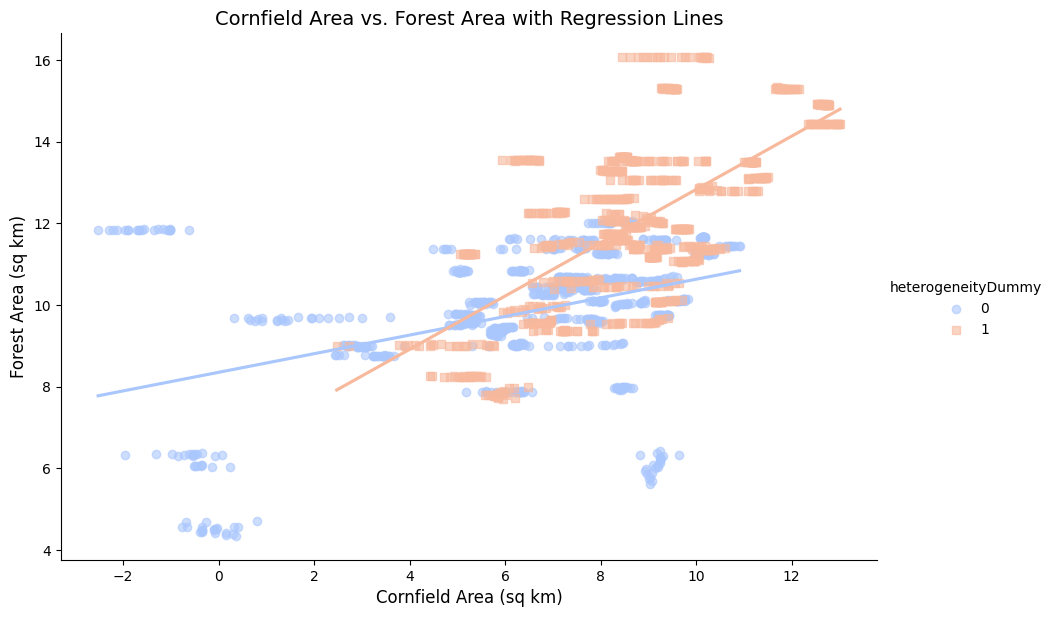

In [110]:
plt.figure(figsize=(10, 6))

# Create a scatterplot with regression lines
sns.lmplot(
    data=last_df,
    x='logcorn',
    y='logforest',
    hue='heterogeneityDummy',
    palette='coolwarm',
    markers=['o', 's'],  # Different markers for each group
    ci=None,  # Remove confidence intervals for clarity (optional)
    height=6,  # Height of the plot
    aspect=1.5,  # Aspect ratio
    scatter_kws={'alpha': 0.6} #transparency
)

# Add labels and title
plt.title('Cornfield Area vs. Forest Area with Regression Lines', fontsize=14)
plt.xlabel('Cornfield Area (sq km)', fontsize=12)
plt.ylabel('Forest Area (sq km)', fontsize=12)

# Show the plot
plt.show()

In [111]:
ind_x = last_df[["logcorn"]]

dep_y = last_df["logforest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logforest   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     952.5
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          4.23e-167
Time:                        19:33:19   Log-Likelihood:                -3332.3
No. Observations:                1738   AIC:                             6669.
Df Residuals:                    1736   BIC:                             6679.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3963      0.120     61.749      0.000       7.161       7.631
logcorn        0.4605      0.015     30.862      0.000       0.431       0.490
==============================================================================
Omnibus:                       83.289   Durbin-Watson:                   0.103
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.388
Skew:                           0.194   Prob(JB):                     7.69e-52
Kurtosis:                       4.761   Cond. No.                         24.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
#Multivariable regression /w Temperature_Change
ind_x = last_df[["logcorn","suitability","temperature","price", "gdp", "logland"]]
ind_x["Interaction variable"] = last_df["heterogeneityDummy"]*ind_x["logcorn"]

dep_y = last_df["logforest"]

# Add constant to the independent variables for the intercept in regression
ind_x = sm.add_constant(ind_x)

# Fit the linear regression model
model = sm.OLS(dep_y, ind_x).fit()

# Display the regression results
model_summary = model.summary()
model_summary

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_7190/1989361534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind_x["Interaction variable"] = last_df["heterogeneityDummy"]*ind_x["logcorn"]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              logforest   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     388.7
Date:                Fri, 06 Dec 2024   Prob (F-statistic):               0.00
Time:                        19:33:19   Log-Likelihood:                -2891.2
No. Observations:                1738   AIC:                             5798.
Df Residuals:                    1730   BIC:                             5842.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    3.1582      0.347      9.113      0.000       2.478       3.838
logcorn                  0.1884      0.015     12.731      0.000       0.159       0.217
suitability           7.686e-07   1.07e-07      7.164      0.000    5.58e-07    9.79e-07
temperature             -0.1918      0.058     -3.316      0.001      -0.305      -0.078
price                    0.0054      0.022      0.249      0.804      -0.037       0.048
gdp                  -1.509e-08   1.89e-08     -0.799      0.424   -5.21e-08    2.19e-08
logland                  0.4927      0.031     16.091      0.000       0.433       0.553
Interaction variable     0.0478      0.010      4.681      0.000       0.028       0.068
==============================================================================
Omnibus:                      423.927   Durbin-Watson:                   0.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1253.345
Skew:                          -1.236   Prob(JB):                    6.91e-273
Kurtosis:                       6.346   Cond. No.                     2.54e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [113]:
!pip install -U DoubleML

Defaulting to user installation because normal site-packages is not writeable


In [114]:
pip install graphviz

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [115]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [116]:
pip install doubleml

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [117]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [118]:
# Import necessary libraries
import numpy as np  # For numerical operations, especially array manipulation
import pandas as pd  # For data handling and manipulation using DataFrames
import graphviz as gr  # For creating and visualizing directed acyclic graphs (DAGs)

import statsmodels.formula.api as smf  # For statistical modeling using R-style formulas

import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
from matplotlib.colors import ListedColormap  # For creating custom colormaps for visualizations
import seaborn as sns  # For statistical data visualization based on matplotlib

from sklearn.model_selection import KFold, RepeatedKFold  # For cross-validation techniques
from sklearn.base import clone  # For cloning estimator objects

from sklearn.tree import DecisionTreeRegressor  # For Decision Tree regression models
from sklearn.ensemble import RandomForestRegressor  # For Random Forest regression models
from xgboost import XGBRegressor  # For XGBoost regression models

import doubleml as dml  # For Double/Debiased Machine Learning
from doubleml import DoubleMLClusterData  # For DoubleML data handling with clustered data

In [119]:
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,logcorn,logforest,logland,loggdp
0,Afghanistan,2000.0,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351,1,-514.690455,550.450000,6.866933,9.415817,13.388153,8.169583
1,Afghanistan,2001.0,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250,1,-674.690455,244.650000,6.684612,9.390601,13.388153,8.194374
2,Afghanistan,2002.0,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376,1,-474.690455,120.450000,6.907755,9.380176,13.388153,8.362920
3,Afghanistan,2003.0,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114,1,1025.309545,4.650000,7.824046,9.370357,13.388153,8.496744
4,Afghanistan,2004.0,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142,1,1025.309545,-63.550000,7.824046,9.364528,13.388153,8.613244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017.0,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867,1,5456.480000,3055.713636,9.570769,13.067789,13.518976,10.161815
1734,Zambia,2018.0,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274,1,1977.100000,2671.613636,9.292847,13.066977,13.518976,10.177780
1735,Zambia,2019.0,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721,1,-466.030000,1607.513636,9.038000,13.064725,13.518976,10.056653
1736,Zambia,2020.0,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790,1,4452.230000,1160.113636,9.498162,13.063777,13.518976,9.801664


# **NO LOG ANALYSIS**

# SLR

In [120]:
# Define the model formula without controls
model_formula_no_controls = 'Q("forest") ~ Q("corn")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
slr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
slr_summary = slr.summary
slr_resid = slr.resid
slr_fit = slr.fittedvalues


# Print the model summary
print(slr.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("forest")   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     12.03
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           0.000854
Time:                        19:33:22   Log-Likelihood:                -26807.
No. Observations:                1738   AIC:                         5.362e+04
Df Residuals:                    1736   BIC:                         5.363e+04
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.635e+05   1.33e+05      1.976      0.0

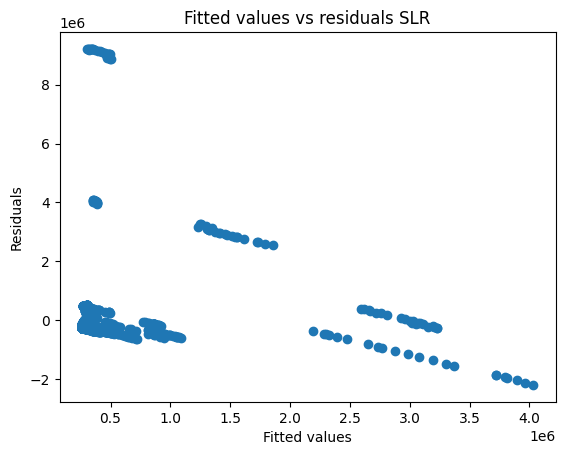

In [121]:
plt.figure()

plt.scatter(slr_fit, slr_resid)
plt.title('Fitted values vs residuals SLR')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')


plt.show()

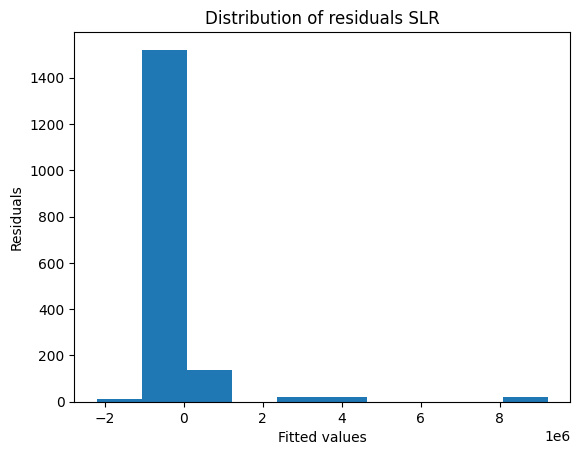

In [122]:
plt.figure()

plt.hist(slr_resid)
plt.title('Distribution of residuals SLR')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')


plt.show()

# MLR

In [123]:
# Define the model formula without controls
model_formula_no_controls = 'Q("forest") ~ Q("corn")+Q("temperature")+Q("price")+Q("gdp")+Q("suitability")+Q("landArea")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
mlr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
mlr_summary = mlr.summary
mlr_resid = mlr.resid
mlr_fit = mlr.fittedvalues


# Print the model summary
print(mlr.summary())

                            OLS Regression Results                            
Dep. Variable:            Q("forest")   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     252.2
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           6.29e-49
Time:                        19:33:22   Log-Likelihood:                -24926.
No. Observations:                1738   AIC:                         4.987e+04
Df Residuals:                    1731   BIC:                         4.990e+04
Df Model:                           6                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.799e+05   7.45e+04  

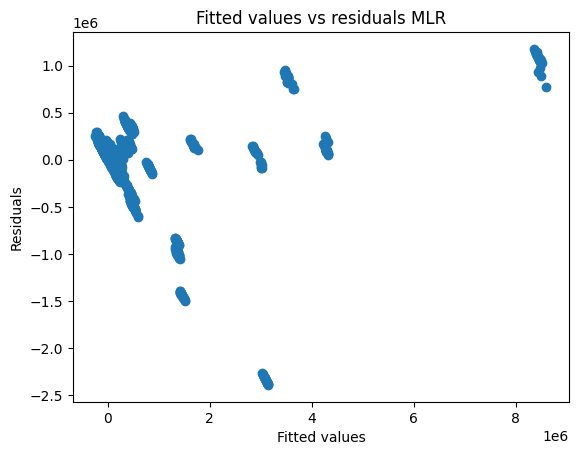

In [124]:
plt.figure()

plt.scatter(mlr_fit, mlr_resid)
plt.title('Fitted values vs residuals MLR')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')


plt.show()

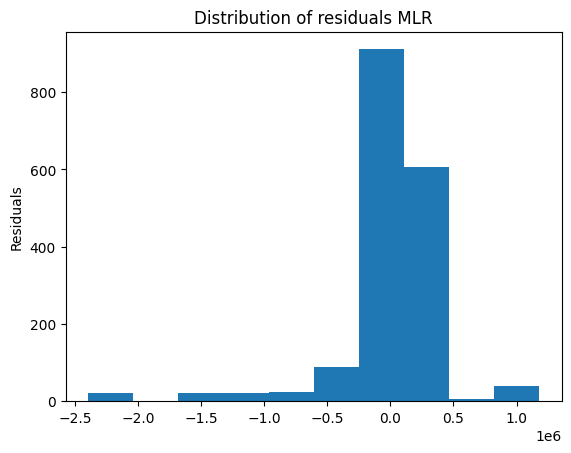

In [125]:
plt.figure()

plt.hist(mlr_resid)
plt.title('Distribution of residuals MLR')
plt.ylabel('Residuals')


plt.show()

# DML

In [126]:
# Create a DataFrame to store the coefficients and confidence intervals
summary_data = {
    'Model': ['Without Controls', 'With Controls'],
    'coef': [slr.params['Q("corn")'], mlr.params['Q("corn")']],
    '2.5 %': [slr.conf_int().loc['Q("corn")', 0], mlr.conf_int().loc['Q("corn")', 0]],
    '97.5 %': [slr.conf_int().loc['Q("corn")', 1], mlr.conf_int().loc['Q("corn")', 1]]
}
summary_df = pd.DataFrame(summary_data).set_index('Model')

# Print the summary
print(summary_df[['coef', '2.5 %', '97.5 %']])

                      coef     2.5 %     97.5 %
Model                                          
Without Controls  8.376345  3.643824  13.108865
With Controls    -2.644857 -9.261485   3.971772


In [127]:
# Create a DoubleMLClusterData object to prepare the data for Double Machine Learning.
# This object specifies the outcome variable ('y'), treatment variable ('x'),
# clustering variable ('id'), and confounders ('x_cols').
obj_dml_data_from_df = DoubleMLClusterData(last_df, "forest", "corn", ['country'], 
                                               x_cols=["temperature", "price", "gdp", "landArea", "suitability"])

# Print the DoubleMLClusterData object to display its properties and data information.
print(obj_dml_data_from_df)

================== DoubleMLClusterData Object ==================

------------------ Data summary      ------------------
Outcome variable: forest
Treatment variable(s): ['corn']
Cluster variable(s): ['country']
Covariates: ['temperature', 'price', 'gdp', 'landArea', 'suitability']
Instrument variable(s): None
No. Observations: 1738

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Columns: 20 entries, country to loggdp
dtypes: float64(17), int64(1), object(2)
memory usage: 271.7+ KB



In [128]:
# Estimate the ATE using Decision Trees as the machine learning model


# Define a Decision Tree Regressor with simple, fixed parameters
tree_model = DecisionTreeRegressor(
    max_depth=10,  # Limit the depth of the tree to prevent overfitting
    min_samples_split=50,  # Minimum samples required to split a node
    min_samples_leaf=20  # Minimum samples required to be at a leaf node
)

# Initialize DoubleMLPLR with the Decision Tree model for both outcome and treatment models
dml_tree= dml.DoubleMLPLR(
    obj_dml_data_from_df,   # This is the DoubleML data object
    ml_l=tree_model,  # Decision Tree model for outcome regression
    ml_m=tree_model,  # Decision Tree model for treatment regression
    n_folds=2         # Use 3-fold cross-fitting (simpler for students to understand)
    #change to 2 folds because of the nb of cofounder --> check if right
)

# Fit the DoubleMLPLR model
dml_tree.fit(store_predictions=True)

# Store the model summary in a variable
tree_summary = dml_tree.summary # Assigns the model summary to the 'forest_summary' variable

# Display the summary of the estimated Average Treatment Effect (ATE)
print(dml_tree.summary)

          coef   std err         t     P>|t|      2.5 %    97.5 %
corn -6.706465  4.680816 -1.432756  0.151928 -15.880695  2.467765


In [129]:
# Estimate the ATE using Random Forest as the machine learning model

# randomForest: Initialize a Random Forest Regressor for outcome regression
randomForest = RandomForestRegressor(
    n_estimators=500,  # Number of trees in the forest
    max_depth=7,  # Maximum depth of each tree
    max_features=3,  # Number of features to consider when looking for the best split
    min_samples_leaf=3)  # Minimum number of samples required to be at a leaf node

# Initialize the DoubleMLPLR model with Random Forest learners
dml_plr_forest = dml.DoubleMLPLR(obj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                 ml_l=randomForest,  # Specifies the Random Forest Regressor for outcome regression
                                 ml_m=randomForest,  # Specifies the Random Forest Classifier for treatment regression
                                 n_folds=2)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
dml_plr_forest.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
forest_summary = dml_plr_forest.summary  # Assigns the model summary to the 'forest_summary' variable

# Print the model summary
print(forest_summary)  # Displays the estimated ATE and other model information

          coef   std err         t     P>|t|      2.5 %    97.5 %
corn -5.612467  6.824449 -0.822406  0.410846 -18.988142  7.763209


In [130]:
# Estimate the ATE using Boosted Trees (XGBoost) as the machine learning model

# boost: Initialize an XGBoost Regressor for outcome regression
boost = XGBRegressor(n_jobs=1,  # Number of parallel threads used to run XGBoost
                     objective="reg:squarederror",  # Objective function for regression (squared error)
                     eta=0.1,  # Learning rate
                     n_estimators=35)  # Number of boosting rounds (trees)


# Set the random seed for reproducibility
np.random.seed(123)  # Ensures consistent results

# Initialize the DoubleMLPLR model with XGBoost learners
dml_plr_boost = dml.DoubleMLPLR(obj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                ml_l=boost,  # Specifies the XGBoost Regressor for outcome regression
                                ml_m=boost,  # Specifies the XGBoost Classifier for treatment regression
                                n_folds=2)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
dml_plr_boost.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
boost_summary = dml_plr_boost.summary  # Assigns the model summary to the 'boost_summary' variable

# Print the model summary
print(boost_summary)  # Displays the estimated ATE and other model information

          coef   std err         t     P>|t|     2.5 %    97.5 %
corn -3.560162  2.051203 -1.735646  0.082626 -7.580446  0.460121


# Comparison of algorithms

In [131]:
# Concatenate the summaries and update the index
plr_summary = pd.concat([summary_df, tree_summary, forest_summary, boost_summary])
plr_summary.index = ['slr', 'mlr', 'tree', 'forest', 'xgb']

# Print the updated summary
print(plr_summary[['coef', '2.5 %', '97.5 %']])

            coef      2.5 %     97.5 %
slr     8.376345   3.643824  13.108865
mlr    -2.644857  -9.261485   3.971772
tree   -6.706465 -15.880695   2.467765
forest -5.612467 -18.988142   7.763209
xgb    -3.560162  -7.580446   0.460121


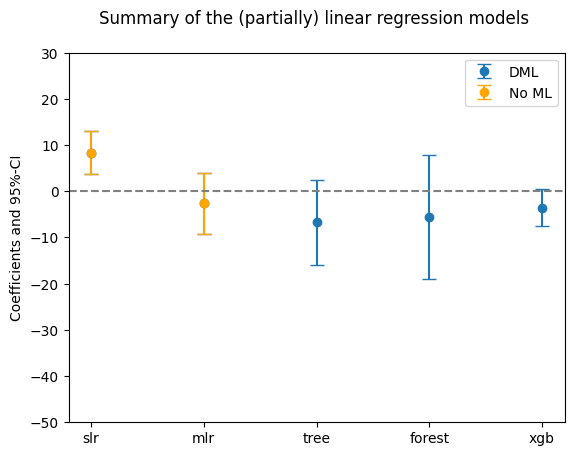

In [132]:
errors = np.full((2, plr_summary.shape[0]), np.nan)
errors[0, :] = plr_summary['coef'] - plr_summary['2.5 %']
errors[1, :] = plr_summary['97.5 %'] - plr_summary['coef']
# Plot error bars for all models
plt.errorbar(plr_summary.index, plr_summary['coef'], yerr=errors, fmt='o', capsize=5)

# Plot the first two coefficients in orange
plt.errorbar(plr_summary.index[:2], plr_summary['coef'][:2], yerr=errors[:, :2], fmt='o', color='orange', capsize=5)

plt.ylim([-50, 30])

plt.legend(['DML', 'No ML'], loc='upper right')  # Place legend in upper left corner

#add horizontal bar at 0
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('Summary of the (partially) linear regression models \n')
_ =  plt.ylabel('Coefficients and 95%-CI')

# **LOG ANALYSIS**

# SLR

In [133]:
# Define the model formula without controls
model_formula_no_controls = 'Q("logforest") ~ Q("logcorn")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
logslr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
logslr_summary = logslr.summary
logslr_resid = logslr.resid
logslr_fit = logslr.fittedvalues


# Print the model summary
print(logslr.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("logforest")   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     18.60
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           4.67e-05
Time:                        19:33:24   Log-Likelihood:                -3332.3
No. Observations:                1738   AIC:                             6669.
Df Residuals:                    1736   BIC:                             6679.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        7.3963      0.862      8.583   

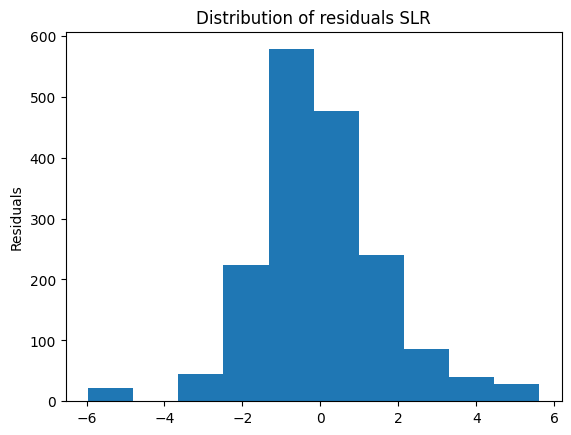

In [134]:
plt.figure()

plt.hist(logslr_resid)
plt.title('Distribution of residuals SLR')
plt.ylabel('Residuals')


plt.show()

# MLR

In [135]:
# Define the model formula without controls
model_formula_no_controls = 'Q("logforest") ~ Q("logcorn")+Q("temperature")+Q("price")+Q("loggdp")+Q("logland")+Q("suitability")'

# Fit the model using ordinary least squares (OLS)
# Use clustered standard errors
logmlr = smf.ols(formula=model_formula_no_controls, data=last_df).fit(cov_type='cluster', cov_kwds={'groups': last_df['country']})

# Store the model summary in a variable
logmlr_summary = logmlr.summary
logmlr_resid = logmlr.resid
logmlr_fit = logmlr.fittedvalues

# Print the model summary
print(logmlr.summary())

                            OLS Regression Results                            
Dep. Variable:         Q("logforest")   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     26.33
Date:                Fri, 06 Dec 2024   Prob (F-statistic):           6.67e-17
Time:                        19:33:24   Log-Likelihood:                -2900.6
No. Observations:                1738   AIC:                             5815.
Df Residuals:                    1731   BIC:                             5853.
Df Model:                           6                                         
Covariance Type:              cluster                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.2039      1.242  

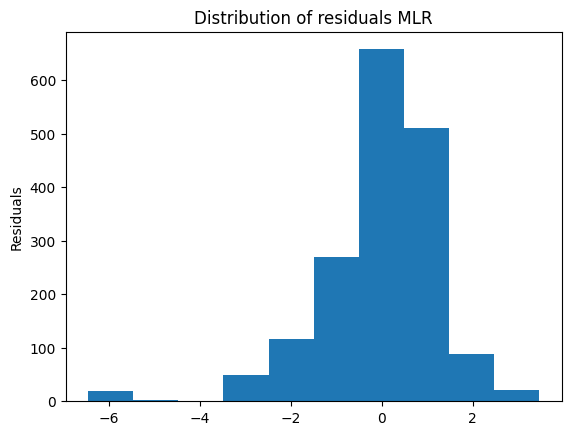

In [136]:
plt.figure()

plt.hist(logmlr_resid)
plt.title('Distribution of residuals MLR')
plt.ylabel('Residuals')


plt.show()

# DML

In [137]:
# Create a DataFrame to store the coefficients and confidence intervals
logsummary_data = {
    'Model': ['Without Controls', 'With Controls'],
    'coef': [logslr.params['Q("logcorn")'], logmlr.params['Q("logcorn")']],
    '2.5 %': [logslr.conf_int().loc['Q("logcorn")', 0], logmlr.conf_int().loc['Q("logcorn")', 0]],
    '97.5 %': [logslr.conf_int().loc['Q("logcorn")', 1], logmlr.conf_int().loc['Q("logcorn")', 1]]
}
logsummary_df = pd.DataFrame(logsummary_data).set_index('Model')

# Print the summary
print(logsummary_df[['coef', '2.5 %', '97.5 %']])

                      coef     2.5 %    97.5 %
Model                                         
Without Controls  0.460524  0.251252  0.669796
With Controls     0.195444  0.005736  0.385151


In [138]:
# Create a DoubleMLClusterData object to prepare the data for Double Machine Learning.
# This object specifies the outcome variable ('y'), treatment variable ('x'),
# clustering variable ('id'), and confounders ('x_cols').
logobj_dml_data_from_df = DoubleMLClusterData(last_df, "logforest", "logcorn", ['country'], 
                                               x_cols=["temperature", "price", "loggdp", "logland", "suitability"])

# Print the DoubleMLClusterData object to display its properties and data information.
print(logobj_dml_data_from_df)

================== DoubleMLClusterData Object ==================

------------------ Data summary      ------------------
Outcome variable: logforest
Treatment variable(s): ['logcorn']
Cluster variable(s): ['country']
Covariates: ['temperature', 'price', 'loggdp', 'logland', 'suitability']
Instrument variable(s): None
No. Observations: 1738

------------------ DataFrame info    ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1738 entries, 0 to 1737
Columns: 20 entries, country to loggdp
dtypes: float64(17), int64(1), object(2)
memory usage: 271.7+ KB



In [139]:
# Estimate the ATE using Decision Trees as the machine learning model


# Define a Decision Tree Regressor with simple, fixed parameters
tree_model = DecisionTreeRegressor(
    max_depth=10,  # Limit the depth of the tree to prevent overfitting
    min_samples_split=50,  # Minimum samples required to split a node
    min_samples_leaf=20  # Minimum samples required to be at a leaf node
)

# Initialize DoubleMLPLR with the Decision Tree model for both outcome and treatment models
logdml_tree= dml.DoubleMLPLR(
    logobj_dml_data_from_df,   # This is the DoubleML data object
    ml_l=tree_model,  # Decision Tree model for outcome regression
    ml_m=tree_model,  # Decision Tree model for treatment regression
    n_folds=2         # Use 3-fold cross-fitting (simpler for students to understand)
    #change to 2 folds because of the nb of cofounder --> check if right
)

# Fit the DoubleMLPLR model
logdml_tree.fit(store_predictions=True)

# Store the model summary in a variable
logtree_summary = logdml_tree.summary  # Assigns the model summary to the 'forest_summary' variable


# Display the summary of the estimated Average Treatment Effect (ATE)
print(logdml_tree.summary)

             coef   std err         t     P>|t|     2.5 %    97.5 %
logcorn  0.331531  0.101313  3.272343  0.001067  0.132961  0.530101


In [140]:
# Estimate the ATE using Random Forest as the machine learning model

# randomForest: Initialize a Random Forest Regressor for outcome regression
randomForest = RandomForestRegressor(
    n_estimators=500,  # Number of trees in the forest
    max_depth=7,  # Maximum depth of each tree
    max_features=3,  # Number of features to consider when looking for the best split
    min_samples_leaf=3)  # Minimum number of samples required to be at a leaf node

# Initialize the DoubleMLPLR model with Random Forest learners
logdml_plr_forest = dml.DoubleMLPLR(logobj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                 ml_l=randomForest,  # Specifies the Random Forest Regressor for outcome regression
                                 ml_m=randomForest,  # Specifies the Random Forest Classifier for treatment regression
                                 n_folds=2)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
logdml_plr_forest.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
logforest_summary = logdml_plr_forest.summary  # Assigns the model summary to the 'forest_summary' variable

# Print the model summary
print(logforest_summary)  # Displays the estimated ATE and other model information

             coef   std err         t     P>|t|     2.5 %    97.5 %
logcorn  0.298666  0.118879  2.512354  0.011993  0.065668  0.531665


In [141]:
# Estimate the ATE using Boosted Trees (XGBoost) as the machine learning model

# boost: Initialize an XGBoost Regressor for outcome regression
boost = XGBRegressor(n_jobs=1,  # Number of parallel threads used to run XGBoost
                     objective="reg:squarederror",  # Objective function for regression (squared error)
                     eta=0.1,  # Learning rate
                     n_estimators=35)  # Number of boosting rounds (trees)


# Set the random seed for reproducibility
np.random.seed(123)  # Ensures consistent results

# Initialize the DoubleMLPLR model with XGBoost learners
logdml_plr_boost = dml.DoubleMLPLR(logobj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                ml_l=boost,  # Specifies the XGBoost Regressor for outcome regression
                                ml_m=boost,  # Specifies the XGBoost Classifier for treatment regression
                                n_folds=2)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
logdml_plr_boost.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
logboost_summary = logdml_plr_boost.summary  # Assigns the model summary to the 'boost_summary' variable

# Print the model summary
print(logboost_summary)  # Displays the estimated ATE and other model information

             coef   std err         t     P>|t|     2.5 %   97.5 %
logcorn  0.295948  0.110432  2.679922  0.007364  0.079506  0.51239


# Comparison of algorithms

In [142]:
# Concatenate the summaries and update the index
logplr_summary = pd.concat([logsummary_df, logtree_summary, logforest_summary, logboost_summary])
logplr_summary.index = ['slr', 'mlr', 'tree', 'forest', 'xgb']

# Print the updated summary
print(logplr_summary[['coef', '2.5 %', '97.5 %']])

            coef     2.5 %    97.5 %
slr     0.460524  0.251252  0.669796
mlr     0.195444  0.005736  0.385151
tree    0.331531  0.132961  0.530101
forest  0.298666  0.065668  0.531665
xgb     0.295948  0.079506  0.512390


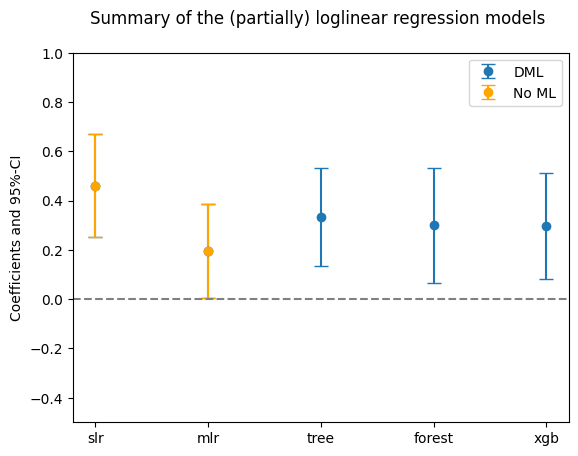

In [143]:
errors = np.full((2, logplr_summary.shape[0]), np.nan)
errors[0, :] = logplr_summary['coef'] - logplr_summary['2.5 %']
errors[1, :] = logplr_summary['97.5 %'] - logplr_summary['coef']
# Plot error bars for all models
plt.errorbar(logplr_summary.index, logplr_summary['coef'], yerr=errors, fmt='o', capsize=5)

# Plot the first two coefficients in orange
plt.errorbar(logplr_summary.index[:2], logplr_summary['coef'][:2], yerr=errors[:, :2], fmt='o', color='orange', capsize=5)

plt.ylim([-.5,1])

plt.legend(['DML', 'No ML'], loc='upper right')  # Place legend in upper left corner

#add horizontal bar at 1
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('Summary of the (partially) loglinear regression models \n')
_ =  plt.ylabel('Coefficients and 95%-CI')

# **FIXED EFFECTS**

In [144]:
!pip install linearmodels

Defaulting to user installation because normal site-packages is not writeable


In [145]:
from linearmodels.panel import PanelOLS
from statsmodels.tools import add_constant

In [146]:
last_df['country'] = last_df['country'].astype('category')
last_df['year'] = last_df['year'].astype('int')

In [147]:
print(last_df['country'].dtype, last_df['year'].dtype)

category int64


In [148]:
last_df[(last_df['country'] == 'Afghanistan') & (last_df['year'] == 2000)]

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,logcorn,logforest,logland,loggdp
0,Afghanistan,2000,652230.0,AFG,96000.0,960.0,12281.1,239393.9,0.367039,2.3175,1.064,12.586175,3531.869351,1,-514.690455,550.45,6.866933,9.415817,13.388153,8.169583


In [149]:
last_df.keys()

Index(['country', 'year', 'landArea', 'iso3', 'Total Size Cornfield in ha',
       'corn', 'forest', 'suitability', '% Land available', 'price',
       'temperature', 'Average_Temperature', 'gdp', 'heterogeneityDummy',
       'Demeaned_Cornfield_Area', 'Demeaned_Forest_Area', 'logcorn',
       'logforest', 'logland', 'loggdp'],
      dtype='object')

# NO LOG FE

In [150]:
fe = last_df[['country', 'year', 'landArea', 'iso3', 'corn', 'forest', 'suitability', 'price', 'temperature', 
              'gdp', 'heterogeneityDummy', 'logcorn', 'logforest', 'logland', 'loggdp']]

In [151]:
fe = fe.set_index(['country', 'year'])

In [152]:
fe.index

MultiIndex([('Afghanistan', 2000),
            ('Afghanistan', 2001),
            ('Afghanistan', 2002),
            ('Afghanistan', 2003),
            ('Afghanistan', 2004),
            ('Afghanistan', 2005),
            ('Afghanistan', 2006),
            ('Afghanistan', 2007),
            ('Afghanistan', 2008),
            ('Afghanistan', 2009),
            ...
            (     'Zambia', 2012),
            (     'Zambia', 2013),
            (     'Zambia', 2014),
            (     'Zambia', 2015),
            (     'Zambia', 2016),
            (     'Zambia', 2017),
            (     'Zambia', 2018),
            (     'Zambia', 2019),
            (     'Zambia', 2020),
            (     'Zambia', 2021)],
           names=['country', 'year'], length=1738)

In [153]:
Y = fe['forest']
X = fe[['corn', 'gdp', 'suitability', 'price', 'temperature', 'landArea']]
X = add_constant(X)

In [154]:
model = PanelOLS(dependent=Y, exog=X, entity_effects=True, time_effects=True, drop_absorbed=True)
results = model.fit()

fe_data = {
    'Model': 'FE',
    'coef': results.params['corn'],
    '2.5 %': results.conf_int().loc['corn', 'lower'],
    '97.5 %': results.conf_int().loc['corn', 'upper']
}
fe_data = pd.DataFrame([fe_data]).set_index('Model')
print(results)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 forest   R-squared:                        0.0239
Estimator:                   PanelOLS   R-squared (Between):              0.7705
No. Observations:                1738   R-squared (Within):               0.0297
Date:                Fri, Dec 06 2024   R-squared (Overall):              0.7705
Time:                        19:33:27   Log-likelihood                -1.837e+04
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      10.015
Entities:                          79   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(4,1634)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             10.015
                            

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

In [155]:
# Concatenate the summaries and update the index
plr_summary = pd.concat([summary_df, tree_summary, forest_summary, boost_summary, fe_data])
plr_summary.index = ['slr', 'mlr', 'tree', 'forest', 'xgb', 'fe']

# Print the updated summary
print(plr_summary[['coef', '2.5 %', '97.5 %']])

            coef      2.5 %     97.5 %
slr     8.376345   3.643824  13.108865
mlr    -2.644857  -9.261485   3.971772
tree   -6.706465 -15.880695   2.467765
forest -5.612467 -18.988142   7.763209
xgb    -3.560162  -7.580446   0.460121
fe      0.014970  -0.061727   0.091666


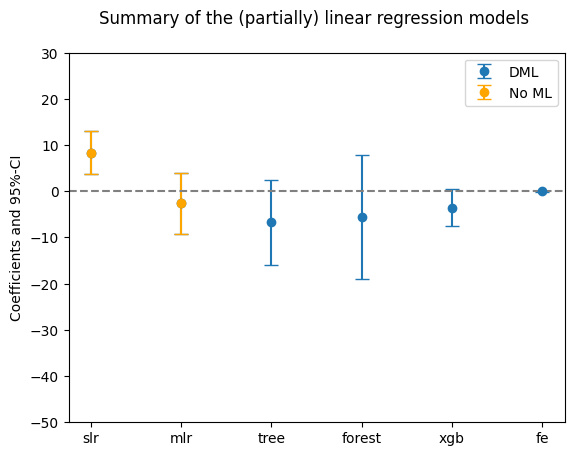

In [156]:
errors = np.full((2, plr_summary.shape[0]), np.nan)
errors[0, :] = plr_summary['coef'] - plr_summary['2.5 %']
errors[1, :] = plr_summary['97.5 %'] - plr_summary['coef']
# Plot error bars for all models
plt.errorbar(plr_summary.index, plr_summary['coef'], yerr=errors, fmt='o', capsize=5)

# Plot the first two coefficients in orange
plt.errorbar(plr_summary.index[:2], plr_summary['coef'][:2], yerr=errors[:, :2], fmt='o', color='orange', capsize=5)

plt.ylim([-50, 30])

plt.legend(['DML', 'No ML'], loc='upper right')  # Place legend in upper left corner

#add horizontal bar at 0
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('Summary of the (partially) linear regression models \n')
_ =  plt.ylabel('Coefficients and 95%-CI')

# LOG FE

In [157]:
logfe = fe

In [158]:
logY = fe['logforest']
logX = fe[['logcorn', 'loggdp', 'logland', 'suitability', 'price', 'temperature']]
logX = add_constant(logX)

In [159]:
logmodel = PanelOLS(dependent=logY, exog=logX, entity_effects=True, time_effects=True, drop_absorbed=True)
log_feresults = logmodel.fit()

logfe_data = {
    'Model': 'FE',
    'coef': log_feresults.params['logcorn'],
    '2.5 %': log_feresults.conf_int().loc['logcorn', 'lower'],
    '97.5 %': log_feresults.conf_int().loc['logcorn', 'upper']
}

logfe_data = pd.DataFrame([logfe_data]).set_index('Model')

print(log_feresults)

/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_mu = self._frame.groupby(level=level).transform("mean")
/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:590: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version

                          PanelOLS Estimation Summary                           
Dep. Variable:              logforest   R-squared:                        0.0399
Estimator:                   PanelOLS   R-squared (Between):             -0.0857
No. Observations:                1738   R-squared (Within):               0.0431
Date:                Fri, Dec 06 2024   R-squared (Overall):             -0.0857
Time:                        19:33:27   Log-likelihood                    3226.9
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      13.575
Entities:                          79   P-value                           0.0000
Avg Obs:                       22.000   Distribution:                  F(5,1633)
Min Obs:                       22.000                                           
Max Obs:                       22.000   F-statistic (robust):             13.575
                            

/var/folders/z1/yry6nb4j25bg_5n5f28yn9zw0000gn/T/ipykernel_7190/2666684929.py:2: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

price

  log_feresults = logmodel.fit()
/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/zeliadecaillet/Library/Python/3.9/lib/python/site-packages/linearmodels/panel/data.py:680: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mu = self._frame.groupby(level=level).mean()
/Users/zeliadecail

In [160]:
# Concatenate the summaries and update the index
logplr_summary = pd.concat([logsummary_df, logtree_summary, logforest_summary, logboost_summary, logfe_data])
logplr_summary.index = ['slr', 'mlr', 'tree', 'forest', 'xgb', 'fe']

# Print the updated summary
print(logplr_summary[['coef', '2.5 %', '97.5 %']])

            coef     2.5 %    97.5 %
slr     0.460524  0.251252  0.669796
mlr     0.195444  0.005736  0.385151
tree    0.331531  0.132961  0.530101
forest  0.298666  0.065668  0.531665
xgb     0.295948  0.079506  0.512390
fe     -0.000385 -0.006173  0.005403


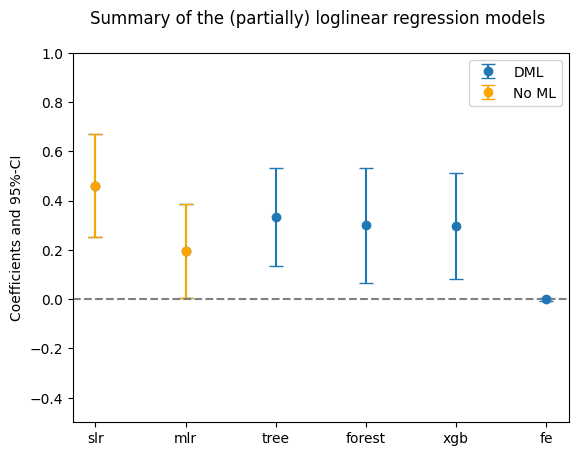

In [161]:
errors = np.full((2, logplr_summary.shape[0]), np.nan)
errors[0, :] = logplr_summary['coef'] - logplr_summary['2.5 %']
errors[1, :] = logplr_summary['97.5 %'] - logplr_summary['coef']
# Plot error bars for all models
plt.errorbar(logplr_summary.index, logplr_summary['coef'], yerr=errors, fmt='o', capsize=5)

# Plot the first two coefficients in orange
plt.errorbar(logplr_summary.index[:2], logplr_summary['coef'][:2], yerr=errors[:, :2], fmt='o', color='orange', capsize=5)

plt.ylim([-.5,1])

plt.legend(['DML', 'No ML'], loc='upper right')  # Place legend in upper left corner

#add horizontal bar at 1
plt.axhline(y=0, color='gray', linestyle='--')

plt.title('Summary of the (partially) loglinear regression models \n')
_ =  plt.ylabel('Coefficients and 95%-CI')

In [162]:
last_df

,country,year,landArea,iso3,Total Size Cornfield in ha,corn,forest,suitability,% Land available,price,temperature,Average_Temperature,gdp,heterogeneityDummy,Demeaned_Cornfield_Area,Demeaned_Forest_Area,logcorn,logforest,logland,loggdp
0,Afghanistan,2000,652230.0,AFG,96000.0,960.00,12281.1,239393.90,0.367039,2.3175,1.064,12.586175,3531.869351,1,-514.690455,550.450000,6.866933,9.415817,13.388153,8.169583
1,Afghanistan,2001,652230.0,AFG,80000.0,800.00,11975.3,239553.90,0.367284,2.0900,1.377,13.413867,3620.525250,1,-674.690455,244.650000,6.684612,9.390601,13.388153,8.194374
2,Afghanistan,2002,652230.0,AFG,100000.0,1000.00,11851.1,239353.90,0.366978,2.3575,1.457,13.051083,4285.191376,1,-474.690455,120.450000,6.907755,9.380176,13.388153,8.362920
3,Afghanistan,2003,652230.0,AFG,250000.0,2500.00,11735.3,237853.90,0.364678,2.4600,0.710,12.485457,4898.791114,1,1025.309545,4.650000,7.824046,9.370357,13.388153,8.496744
4,Afghanistan,2004,652230.0,AFG,250000.0,2500.00,11667.1,237853.90,0.364678,2.0475,1.482,13.233360,5504.073142,1,1025.309545,-63.550000,7.824046,9.364528,13.388153,8.613244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,Zambia,2017,743390.0,ZMB,1433944.0,14339.44,473443.9,17364.16,0.023358,3.5075,0.579,21.990675,25895.263867,1,5456.480000,3055.713636,9.570769,13.067789,13.518976,10.161815
1734,Zambia,2018,743390.0,ZMB,1086006.0,10860.06,473059.8,20843.54,0.028038,3.7500,0.998,22.302766,26311.984274,1,1977.100000,2671.613636,9.292847,13.066977,13.518976,10.177780
1735,Zambia,2019,743390.0,ZMB,841693.0,8416.93,471995.7,23286.67,0.031325,3.8775,1.349,22.617600,23310.346721,1,-466.030000,1607.513636,9.038000,13.064725,13.518976,10.056653
1736,Zambia,2020,743390.0,ZMB,1333519.0,13335.19,471548.3,18368.41,0.024709,4.8400,1.386,22.167939,18063.780790,1,4452.230000,1160.113636,9.498162,13.063777,13.518976,9.801664


In [163]:
#last_df.to_csv('output.csv', index=False) #save the data to a csv file

In [164]:
# Step 0: Load and prepare the dataset
df_full = pd.read_csv(filepath + 'Database.csv')

#some cofounders that might be useful, my domain knowledge tells me that these are important
# Define variables of interest for initial analysis
variables_of_interest = ['country', 'year', 'corn', 'forest', 'suitability', 'price', 'temperature', 'gdp']
df_cleaned = df_full[variables_of_interest]

#this step is only necessary, if you don't have the data already cleaned, not the case for me
# Drop rows with missing values and apply transformations
#df_cleaned = df_cleaned.dropna()
#df_cleaned['wdi_co2'] = df_cleaned['wdi_co2'] * 1000
#df_cleaned['pg_regtoreen'] = df_cleaned['pg_regtoreen'] / 1000
#df_cleaned = pd.get_dummies(df_cleaned, columns=['ccodealp'], drop_first=False)

# Merge df_cleaned with df_full and retain only perfect matches
#df_merged = pd.merge(df_cleaned[['cname', 'year']], df_full, on=['cname', 'year'], how='left')
#perfect_match_columns = [col for col in df_merged.columns if df_merged[col].notna().all()]
#df = df_merged[perfect_match_columns]
df = df_cleaned


#drop non necessary columns
# don't want to work with the identifiers
#df = df.drop([ 'cname','ccode', 'ccode_qog', 'cname_qog', 'ccodecow', 'version', 'cname_year', 'ccodealp_year'], axis=1)

# Sort the DataFrame by 'id' and 'year' to ensure correct ordering
#df = df.sort_values(['ccodealp', 'year']).reset_index(drop=True)

df.head()

,country,year,corn,forest,suitability,price,temperature,gdp
0,Afghanistan,2000.0,960.0,12281.1,239393.9,2.3175,1.064,3531.869351
1,Afghanistan,2001.0,800.0,11975.3,239553.9,2.0900,1.377,3620.525250
2,Afghanistan,2002.0,1000.0,11851.1,239353.9,2.3575,1.457,4285.191376
3,Afghanistan,2003.0,2500.0,11735.3,237853.9,2.4600,0.710,4898.791114
4,Afghanistan,2004.0,2500.0,11667.1,237853.9,2.0475,1.482,5504.073142


In [165]:
# Compute the first difference for each variable in order to capture individual fixed effects
# if use the fix effect

# Identify columns to compute first differences (all the columns in this case)
exclude_columns = ['country', 'year']
columns_to_diff = df.columns[~df.columns.isin(exclude_columns)]

# Sort the DataFrame by 'id' and 'year' to ensure correct ordering
df_sorted = df.sort_values(['country', 'year']).reset_index(drop=True)

# Compute the first difference within each individual group
df_s = df_sorted.groupby('country')[columns_to_diff].diff().dropna()  # Drop NaN for the first observation in each group


# Display the first-differenced DataFrame
df_s.head()

,corn,forest,suitability,price,temperature,gdp
1,-160.0,-305.8,160.0,-0.2275,0.313,88.655899
2,200.0,-124.2,-200.0,0.2675,0.080,664.666126
3,1500.0,-115.8,-1500.0,0.1025,-0.747,613.599738
4,0.0,-68.2,0.0,-0.4125,0.772,605.282028
5,110.0,-15.7,-110.0,0.1100,-0.969,970.906693


In [166]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

def hybrid_variable_selection_with_iv(data, x_col, y_col, lambdas=0.01, pval_threshold=0.1, max_features=10):
    """
    Hybrid approach to select confounders and instruments using Lasso and Multiple Linear Regression,
    with a cap on the number of variables selected by Lasso.

    Parameters:
    - data: pd.DataFrame, input dataset with all variables.
    - x_col: str, name of the treatment variable (X).
    - y_col: str, name of the outcome variable (Y).
    - alpha: float, regularization strength for Lasso.
    - pval_threshold: float, significance threshold for p-values in multiple linear regression.
    - max_features: int, maximum number of variables to retain from Lasso selection.

    Returns:
    - confounders: list, selected potential confounders (significant for both X and Y).
    - instruments: list, selected potential instruments (significant for X but not Y).
    """
    # Prepare predictors
    predictors = data.drop(columns=[x_col, y_col])
    feature_names = predictors.columns

    # Standardize predictors
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(predictors)

    # Step 1: Lasso for Initial Selection
    lasso = Lasso(alpha=lambdas, max_iter=1000)
    lasso.fit(X_scaled, data[x_col])
    coef_series = pd.Series(lasso.coef_, index=feature_names)

    # Get Lasso coefficients
    coef_series = pd.Series(lasso.coef_, index=feature_names)

    # Keep the top `max_features` variables based on absolute coefficients
    top_features = coef_series[coef_series != 0].abs().nlargest(max_features).index.tolist()


    # Filter dataset to keep only top features
    selected_data = data[top_features]

    # Step 2: Multiple Linear Regression for Refinement
    def significant_variables(response, predictors, threshold):
        model = sm.OLS(response, sm.add_constant(predictors)).fit()
        pvals = model.pvalues.drop('const')  # Exclude constant's p-value
        return pvals

    # Test significance for X (treatment)
    pvals_for_x = significant_variables(data[x_col], selected_data, pval_threshold)

    # Test significance for Y (outcome)
    pvals_for_y = significant_variables(data[y_col], selected_data, pval_threshold)

    # Step 3: Create lists for confounders and instruments
    confounders = [
        var for var in top_features
        if (pvals_for_x[var] < pval_threshold) and (pvals_for_y[var] < pval_threshold)
    ]
    instruments = [
        var for var in top_features
        if (pvals_for_x[var] < pval_threshold) and (pvals_for_y[var] >= pval_threshold)
    ]

    return confounders, instruments

# Example usage
# df = your_data_frame
confounders, instruments = hybrid_variable_selection_with_iv(
    data=df_s,
    x_col='corn',  # Treatment variable
    y_col='forest',       # Outcome variable
    lambdas=0.01,            # Regularization strength for Lasso #possible to play with the strength of the regularization
    pval_threshold=0.1,    # Significance threshold for p-values #possible to play with the threshold for the p-value
    max_features=1000        # Limit the number of features selected by Lasso #possible to play with the number of features
)

print(f"Selected Potential Confounders (Count:{len(confounders)}) :", confounders)
print(f"Selected Potential Instruments (Count:{len(instruments)}) :", instruments)


Selected Potential Confounders (Count:0) : []
Selected Potential Instruments (Count:1) : ['suitability']
